**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [1]:
from __future__ import print_function, division
import matplotlib.pylab as plt

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)

# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

In [3]:
# setting a seed to insure reproducibility
np.random.seed(2930)

# creating exogenous variable; assigning to  x
x = np.linspace(5,100,10)

# choosing a slope
a = 2

# calculating the endogenous variable; assigning to y
y = line(a, x, 0, errors)

# visualizing the data
print('x = {0}\ny = {1}'.format(x,y))

x = [   5.           15.55555556   26.11111111   36.66666667   47.22222222
   57.77777778   68.33333333   78.88888889   89.44444444  100.        ]
y = [  11.52188184   29.57480937   40.55309999   78.42323017   87.40269116
  115.73241571  135.53028719  158.4357327   177.9559502   203.06192152]


Text(0.5,1,'A plot for a line showing each data point with error bars')

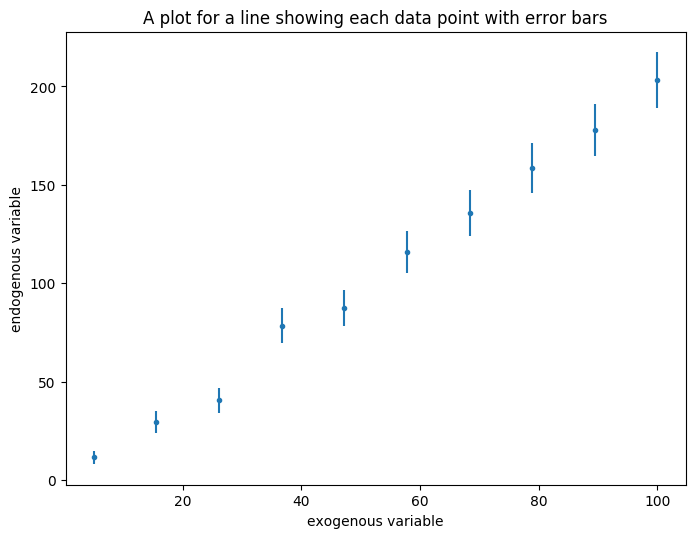

In [4]:
# plotting the data
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
ax.errorbar(x, y, yerr=errors(y), marker='.', linestyle=' ')

ax.set_xlabel('exogenous variable')
ax.set_ylabel('endogenous variable')
ax.set_title('A plot for a line showing each data point with error bars')

#### **Figure 1:** The figure above represents plotting a random set of data with error bars.  The data set has the following parameters: slope = 2 and y-intercept = 0

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [5]:
# applying sm.api_add_constant to x; assigning the result to X
X = sm.add_constant(x)
print('x = {0}\ny = {1}\nX = {2}'.format(x,y,X))

x = [   5.           15.55555556   26.11111111   36.66666667   47.22222222
   57.77777778   68.33333333   78.88888889   89.44444444  100.        ]
y = [  11.52188184   29.57480937   40.55309999   78.42323017   87.40269116
  115.73241571  135.53028719  158.4357327   177.9559502   203.06192152]
X = [[   1.            5.        ]
 [   1.           15.55555556]
 [   1.           26.11111111]
 [   1.           36.66666667]
 [   1.           47.22222222]
 [   1.           57.77777778]
 [   1.           68.33333333]
 [   1.           78.88888889]
 [   1.           89.44444444]
 [   1.          100.        ]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [6]:
# THE WRONG WAY
smfit_w = smf.OLS(y, x).fit()
smfit_w.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     5800.
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           5.87e-14
Time:                        21:20:20   Log-Likelihood:                -29.790
No. Observations:                  10   AIC:                             61.58
Df Residuals:                       9   BIC:                             61.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.9929      0.026     76.161      0.000         1.934     2.052
==============================================================================
Omnibus:                        4.628   Durbin-Watson:                   2.719
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                1.832
Skew:                          -1.035   Prob(JB):                        0.400
Kurtosis:                       3.333   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
smfit_w.params

array([ 1.99293524])

In [8]:
# The right way
smfit_r = smf.OLS(y, X).fit()
smfit_r.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1527.
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           2.02e-10
Time:                        21:20:20   Log-Likelihood:                -29.175
No. Observations:                  10   AIC:                             62.35
Df Residuals:                       8   BIC:                             62.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -3.2384      3.164     -1.024      0.336       -10.534     4.058
x1             2.0392      0.052     39.075      0.000         1.919     2.160
==============================================================================
Omnibus:                        1.960   Durbin-Watson:                   3.075
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                0.721
Skew:                          -0.657   Prob(JB):                        0.697
Kurtosis:                       2.926   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
smfit_r.params

array([-3.23836803,  2.03919181])

#### The summary of the wrong model doesn't give us an intercept. By default OLS doesn't provide an intercept. Using sm.api.add_constant() will add a constant column to the data set, which will result in forcing OLS to calculate an intercept defined in the summary as 'const'. We notice a slight decrease in the R-squared value since the formula used for calculating R-squared without the constant is incorrect.

# 4. plot the data (as points) and both statsmodels fits

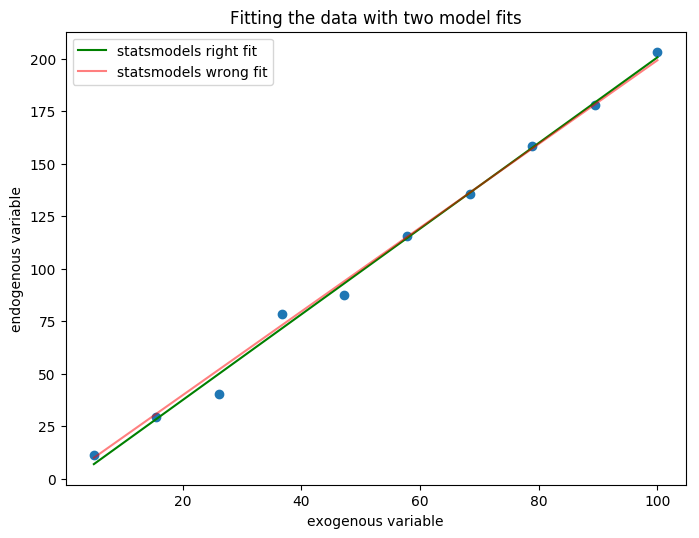

In [10]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# plotting the data points
ax.scatter(x, y)

#plotting the both statmodels
ax.plot(x, x * smfit_r.params[1] + smfit_r.params[0], 'g', label='statsmodels right fit')
ax.plot(x, smfit_w.predict(x), 'r', alpha=0.5, label='statsmodels wrong fit')
        
ax.set_xlabel('exogenous variable')
ax.set_ylabel('endogenous variable')
ax.set_title('Fitting the data with two model fits')

plt.legend()

#### **Figure2:** We notice that ther is a slight difference between the two models generated by statsmodels in the way they fit the data.

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [11]:
# setting a seed to insure reproducibility
np.random.seed(293091)

# creating exogenous variable; assigning to  x
x = np.linspace(5,100,10)

# choosing a slope
a = 4

# calculating the endogenous variable; assigning to y
y = line(a, x, a*100, errors)

# visualizing the data
print('x = {0}\ny = {1}'.format(x,y))

x = [   5.           15.55555556   26.11111111   36.66666667   47.22222222
   57.77777778   68.33333333   78.88888889   89.44444444  100.        ]
y = [ 419.22840859  462.64242046  511.17737943  548.46185771  584.04370825
  655.75832447  662.17527596  731.05966651  761.24484188  807.02286094]


Text(0.5,1,'A plot for a line showing each data point with error bars')

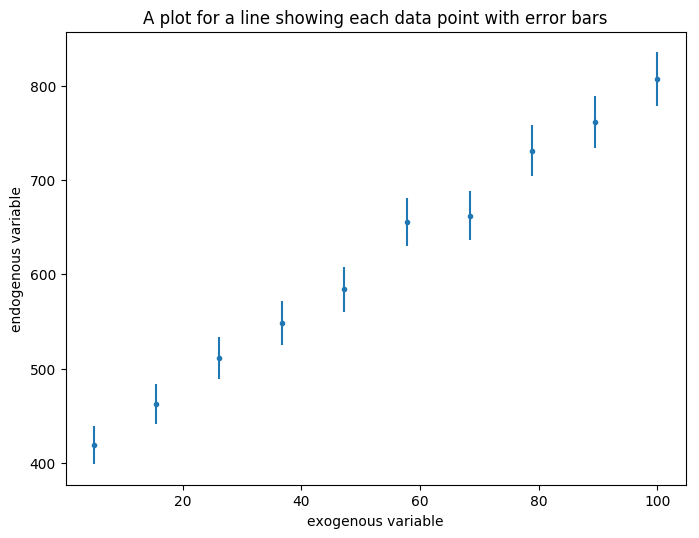

In [12]:
# plotting the data
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
ax.errorbar(x, y, yerr=errors(y), marker='.', linestyle=' ')

ax.set_xlabel('exogenous variable')
ax.set_ylabel('endogenous variable')
ax.set_title('A plot for a line showing each data point with error bars')

#### **Figure 3:** The figure above represents plotting a random set of data with error bars. The data set has the following parameters: slope = 4 and y-intercept = 400

# 6. repeat step 3

In [13]:
# The wrong way
smfit_w = smf.OLS(y, x).fit()
smfit_w.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     78.91
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           9.50e-06
Time:                        21:20:20   Log-Likelihood:                -67.197
No. Observations:                  10   AIC:                             136.4
Df Residuals:                       9   BIC:                             136.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             9.7928      1.102      8.883      0.000         7.299    12.287
==============================================================================
Omnibus:                        1.013   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.603   Jarque-Bera (JB):                0.633
Skew:                          -0.014   Prob(JB):                        0.729
Kurtosis:                       1.768   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# The right way
smfit_r = smf.OLS(y, sm.add_constant(x)).fit()
smfit_r.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1394.
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           2.91e-10
Time:                        21:20:20   Log-Likelihood:                -36.548
No. Observations:                  10   AIC:                             77.10
Df Residuals:                       8   BIC:                             77.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        400.4844      6.614     60.555      0.000       385.233   415.735
x1             4.0723      0.109     37.330      0.000         3.821     4.324
==============================================================================
Omnibus:                        1.873   Durbin-Watson:                   3.569
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                0.347
Skew:                           0.439   Prob(JB):                        0.841
Kurtosis:                       3.252   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

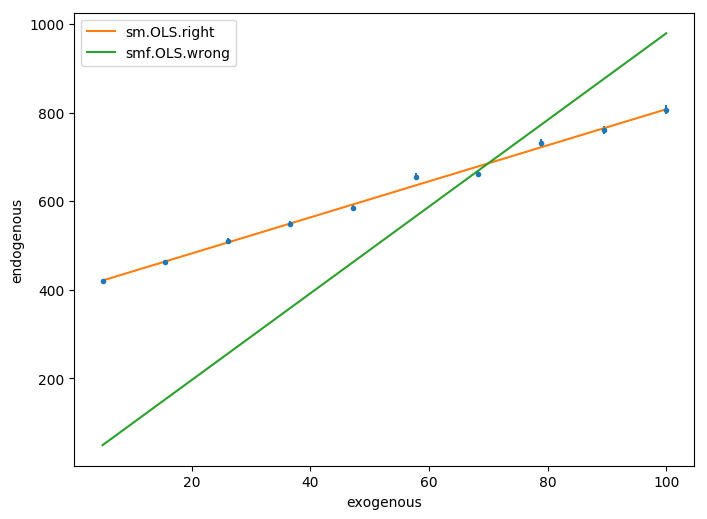

In [15]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
plt.subplots(figsize=(8,6), dpi=100)
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
plt.errorbar(x, y, yerr=errors(x), fmt='.')
plt.plot(x, smfit_r.fittedvalues, '-', label="sm.OLS.right")
plt.plot(x, smfit_w.fittedvalues, '-', label="smf.OLS.wrong")
plt.xlabel("exogenous")
plt.ylabel("endogenous")
plt.legend();

#### The summary of the wrong model doesn't give us an intercept. By default OLS doesn't provide an intercept. Using sm.api.add_constant() will add a constant column to the data set, which will result in forcing OLS to calculate an intercept value defined in the summary as 'const'.

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [16]:
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.WLS.html
smfit_wls = smf.WLS(y, sm.add_constant(x), weights=list(1/sqrt(x))).fit()
smfit_wls.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            WLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1968.
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           7.36e-11
Time:                        21:20:20   Log-Likelihood:                -35.529
No. Observations:                  10   AIC:                             75.06
Df Residuals:                       8   BIC:                             75.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        399.7799      4.529     88.262      0.000       389.335   410.225
x1             4.0843      0.092     44.361      0.000         3.872     4.297
==============================================================================
Omnibus:                        1.845   Durbin-Watson:                   3.530
Prob(Omnibus):                  0.397   Jarque-Bera (JB):                0.376
Skew:                           0.464   Prob(JB):                        0.829
Kurtosis:                       3.206   Cond. No.                         79.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The WLS model produces an R-sqaured value higher than the OLS model. WLS helped create a model that better fits the data.